# Project: Investigate a Dataset (tmdb movie dataset)

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Data Wrangling">Data Wrangling</a></li>
<li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>



## Introduction

**This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.**


**I'll seek to explore the following questions associated with this dataset:**

> 0.  Which 10 directors directed the greatest number of movies?
> 1.  How many movies are released every year? How is the trend like?
> 2.  Do audiences have a preference towards movies of a certain period?
> 3.  Is budget related to the popularity of a movie?
> 4.  Is runtime related to how popular a movie is?
> 5.  Are movies financially more suceessful generally receive better rating?
> 6.  Are movies financially more suceessful generally more popular?

**Import the dataset**


In [4]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')



## Data Wrangling

In [5]:
df.head(3)   #to get a feel of what the data look like

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [6]:
df.info()  # to understand basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### **We can see that some columns contain missing values**
1. "imdb_id" is missing 10 entries
2. "cast" is missing 76 entries
3. "homepage" is missing 7930 entries
4. "director" is missing 44 entries
5. "tagline" is missing 2824 entries
6. "keywords" is missing 1493 entries
7. "overview" is missing 4 entries
8. "genres" is missing 23 entries
9. "production_companies" is missing 1030 entries

**but since these columns are not likely to entail much comparison or ranking in the later analysis process, I don't feel it necessary to fill these N/A values.** 

**There are some entries in "runtime" showing 0 minutes, which would affect the result. I will replace them with NaN** 

In [7]:
# Replace runtime value of 0 to NaN, Since it will affect the result.
df['runtime'] = df['runtime'].replace(0, np.NaN)

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10835.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.362898,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,30.946957,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,112.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Some 0 values are in budget, revenue, which doesn't make sense. Let's print a few of these to see if there is a pattern associated with 0 values.**

In [11]:
zero_revenue = df.query('revenue == 0')

In [12]:
zero_budget = df.query('budget == 0')

In [13]:
# number of movies with zero revenue
zero_revenue.count()['id']

6016

In [14]:
# number of movies with zero budget
zero_budget.count()['id']

5696

In [15]:
# number of movies with both revenue and budget missing
zero_revenue_and_budget = df.query('budget == 0 and revenue == 0')
zero_revenue_and_budget.groupby('budget').count()['id']

budget
0    4701
Name: id, dtype: int64

**So, I could conclude that it's missing values that cause so many zero values in the dataset. In order for any comparison to be valid, I will replace the zero values with NaN.**

In [16]:
# replace zeros in budget, revenue, budget_adj and revenue_adj
df['budget'] = df['budget'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Check duplicates

In [18]:
df.duplicated().value_counts()  #check to see whether there's any duplicate data 

False    10865
True         1
dtype: int64

### **We can see there is one duplicated value that needs to be dropped**

In [19]:
df.drop_duplicates(inplace = True) #drop the duplicate
df.duplicated().value_counts()  #check again

False    10865
dtype: int64

In [20]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


## Exploratory Data Analysis

### Question 0: Which 10 directors directed the greatest number of movies? 

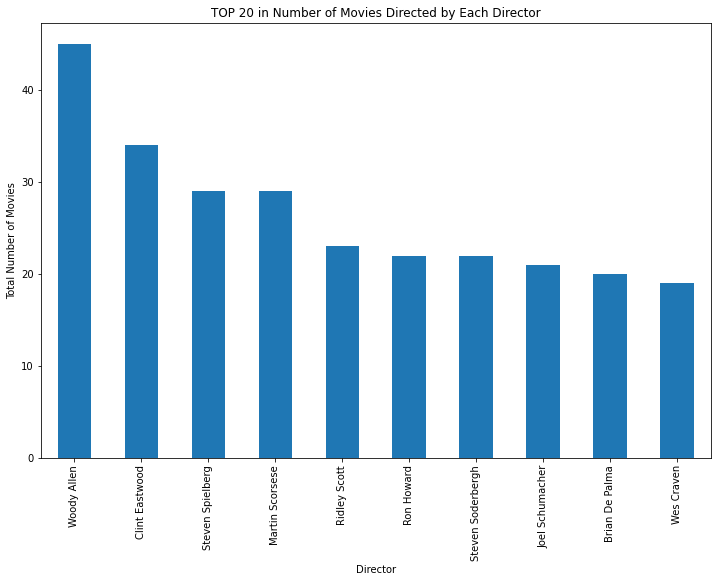

In [181]:
sorted_director = df['director'].value_counts().sort_values(ascending=False)[:10]
sorted_director.plot(kind = 'bar', figsize = (12, 8),xlabel="Director", ylabel="Total Number of Movies");

plt.title('TOP 10 in Number of Movies Directed by Each Director');

### Conclusion: clearly, these 10 directors contributed the most movies into this database and expectedly names familiar to movie fans. 

### Q1. How many movies are released every year? How is the trend like?

In [22]:
# count movies released per year
release_annually = df.groupby('release_year').count()['id']
release_annually.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

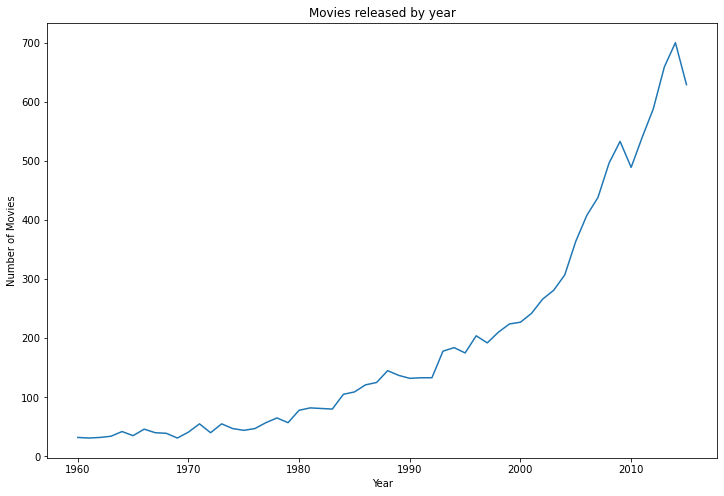

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(release_annually)
plt.title('Movies released by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies');

### Conclusion: it's clear from the graph that the number of movies released every year has been showing a clear upward trend despite occasional fluctuations, with the changes after year 2000 much more prominent.

### Q2. Do audiences have a preference towards movies of a certain period?

In [98]:
# create a function that speeds up comparison
def compare(var1, var2):
    comparison = df.groupby(var1).mean()[var2]
    return comparison


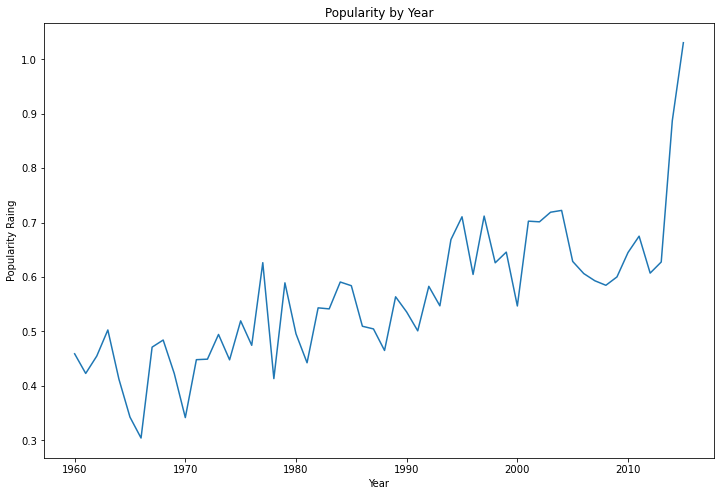

In [100]:
# plot mean popularity vs year
mean_popularity_by_year = compare('release_year', 'popularity')
mean_index = mean_popularity_by_year.index

plt.figure(figsize=(12, 8))
plt.plot(mean_index, mean_popularity_by_year, label = 'Average Popularity')
plt.title('Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity Raing');

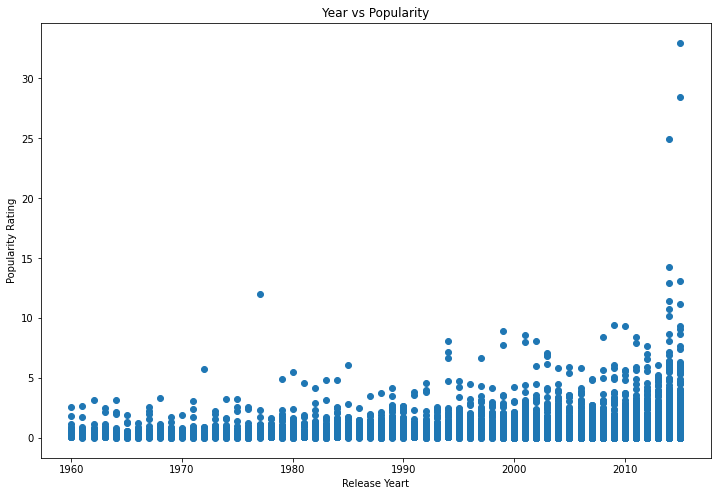

In [29]:
# scatter plot release year vs popularity
plt.figure(figsize=(12, 8))
plt.scatter(df['release_year'], df['popularity'])

plt.title('Year vs Popularity')
plt.xlabel('Release Yeart')
plt.ylabel('Popularity Rating');

### Conclusion: As is shown in both graphs, there seems to be a correlation between release year and popularity of a movie. Movies released in recent decades generally assume better populary ratings, especially those released after year 2010.

### Q3. Is budget related to the popularity of a movie?


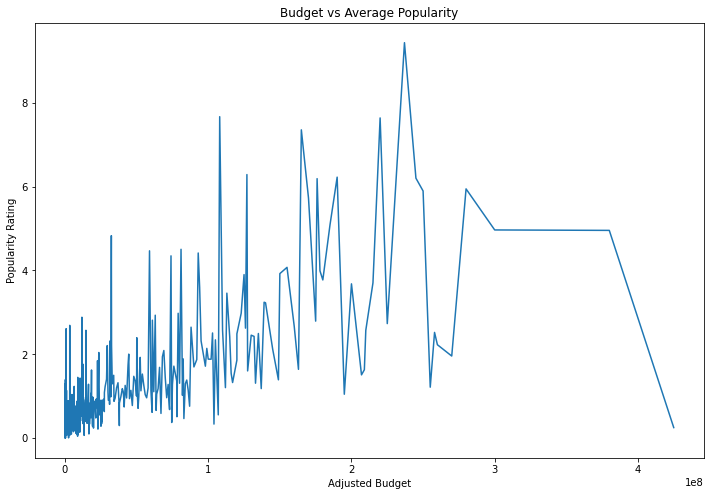

In [103]:
# plot budget vs average popularity using previously defined function
plt.figure(figsize=(12, 8))
mean_popularity_by_budget = compare('budget', 'popularity')

plt.plot(mean_popularity_by_budget.index, mean_popularity_by_budget)
plt.title('Budget vs Average Popularity')
plt.xlabel('Adjusted Budget')
plt.ylabel('Popularity Rating');

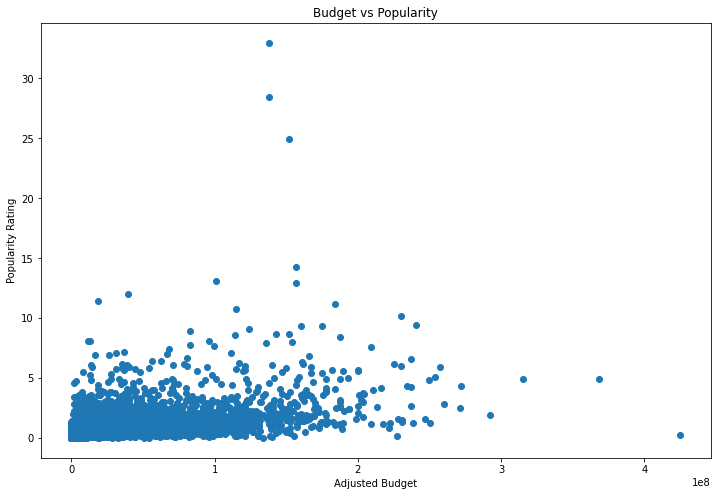

In [31]:
# scatter plot budget vs popularity
plt.figure(figsize=(12, 8))
plt.scatter(df['budget_adj'], df['popularity'])

plt.title('Budget vs Popularity')
plt.xlabel('Adjusted Budget')
plt.ylabel('Popularity Rating');

### Conclusion: based on what's indicated by both graphs, we can tell that movies with higher budget are generally associated with relatively better popularity rating, but this doesn't mean that it's the absolute determining factor of whether a movie turns out to be popular. I can only say that movies with a higher budget are generally more popular.

### Q4. Is runtime related to how popular a movie is?


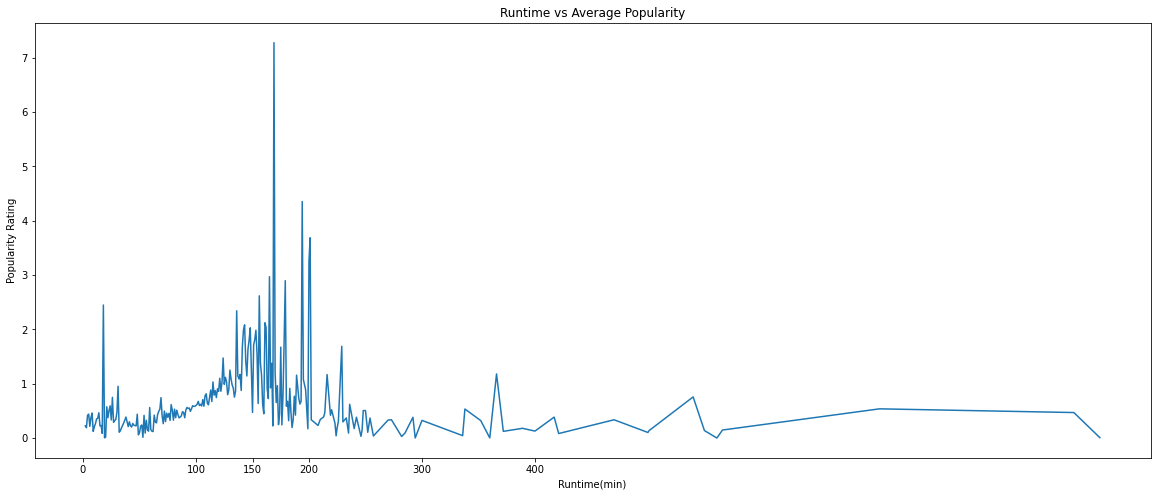

In [104]:
# plot budget vs average popularity using previously defined function
plt.figure(figsize=(20, 8))
mean_popularity_by_runtime = compare('runtime','popularity')

plt.xticks([0,100,150,200,300,400])
plt.plot(mean_popularity_by_runtime.index, mean_popularity_by_runtime)
plt.title('Runtime vs Average Popularity')
plt.xlabel('Runtime(min)')
plt.ylabel('Popularity Rating');

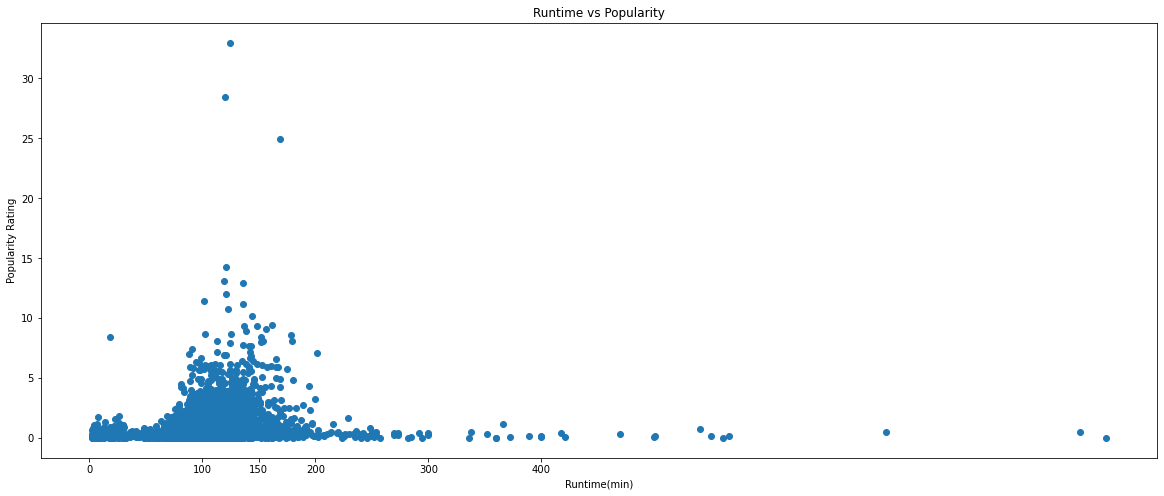

In [47]:
# scatter plot runtime vs popularity
plt.figure(figsize=(20, 8))
plt.scatter(df['runtime'], df['popularity'])

plt.xticks([0,100,150,200,300,400])
plt.title('Runtime vs Popularity')
plt.xlabel('Runtime(min)')
plt.ylabel('Popularity Rating');

### Conclusion: from both graphs, we can see there is a correlation between runtime and popularity of a movie. Specifically, movies with a runtime roughly between 100 – 150 minutes are associated with better popularity rating, while the ones with a runtime between 150 – 170 minutes show greater popularity in terms of average. Clearly, audiences seem to have a preference for the length of a movie, and neither short movies nor overlong ones are favorable.

### Q5. Are movies financially more suceessful generally receive better rating?

In [52]:
# calculate profit adjusted as a difference between revenue adjusted and budget adjusted
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df['profit_adj']

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10861             NaN
10862             NaN
10863             NaN
10864             NaN
10865             NaN
Name: profit_adj, Length: 10865, dtype: float64

In [53]:
df['profit_adj'].describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit_adj, dtype: float64

In [55]:
# set a new variable representing movies with a profit above or equal to average
df_above = df[df['profit_adj'] >= df['profit_adj'].mean()] 
df_above.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


Text(0, 0.5, 'Profit Adjusted')

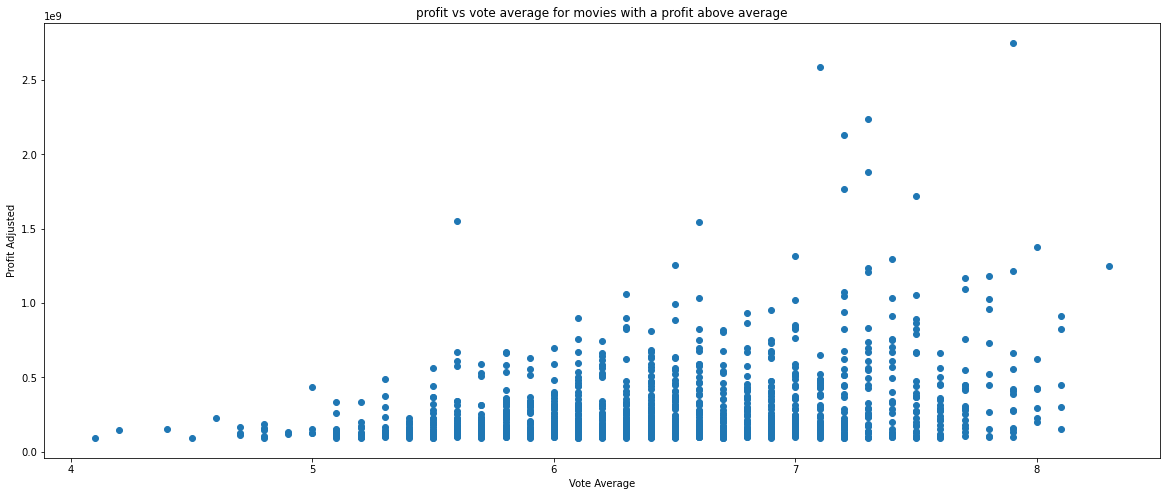

In [70]:
# scatter plot profit vs vote average for movies with a profit above average
plt.figure(figsize=(20, 8))
plt.scatter(df_above['vote_average'], df_above['profit_adj'])


plt.title('profit vs vote average for movies with a profit above average')
plt.xlabel('Vote Average');
plt.ylabel('Profit Adjusted')

In [57]:
# set a new variable representing movies with a profit below average
df_below = df[df['profit_adj'] < df['profit_adj'].mean()] 
df_below.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
11,76757,tt1617661,6.189369,176000003.0,183987723.0,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,http://www.jupiterascending.com,Lana Wachowski|Lilly Wachowski,Expand your universe.,...,124.0,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2/4/15,1937,5.2,2015,1.619199e+08,1.692686e+08,7.348699e+06
12,264660,tt0470752,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,http://exmachina-movie.com/,Alex Garland,There is nothing more human than the will to s...,...,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07,2.011985e+07
20,158852,tt1964418,5.462138,190000000.0,209035668.0,Tomorrowland,Britt Robertson|George Clooney|Raffey Cassidy|...,http://movies.disney.com/tomorrowland,Brad Bird,Imagine a world where nothing is impossible.,...,130.0,Action|Family|Science Fiction|Adventure|Mystery,Walt Disney Pictures|Babieka|A113,5/19/15,1899,6.2,2015,1.747999e+08,1.923127e+08,1.751281e+07
21,307081,tt1798684,5.337064,30000000.0,91709827.0,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,123.0,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07,5.677302e+07
28,314365,tt1895587,4.062293,20000000.0,88346473.0,Spotlight,Mark Ruffalo|Michael Keaton|Rachel McAdams|Lie...,http://www.spotlightthefilm.com,Tom McCarthy,Break the story. Break the silence.,...,128.0,Drama|Thriller|History,Participant Media|Open Road Films|Anonymous Co...,11/6/15,1559,7.8,2015,1.839999e+07,8.127872e+07,6.287873e+07


Text(0, 0.5, 'Profit Adjusted')

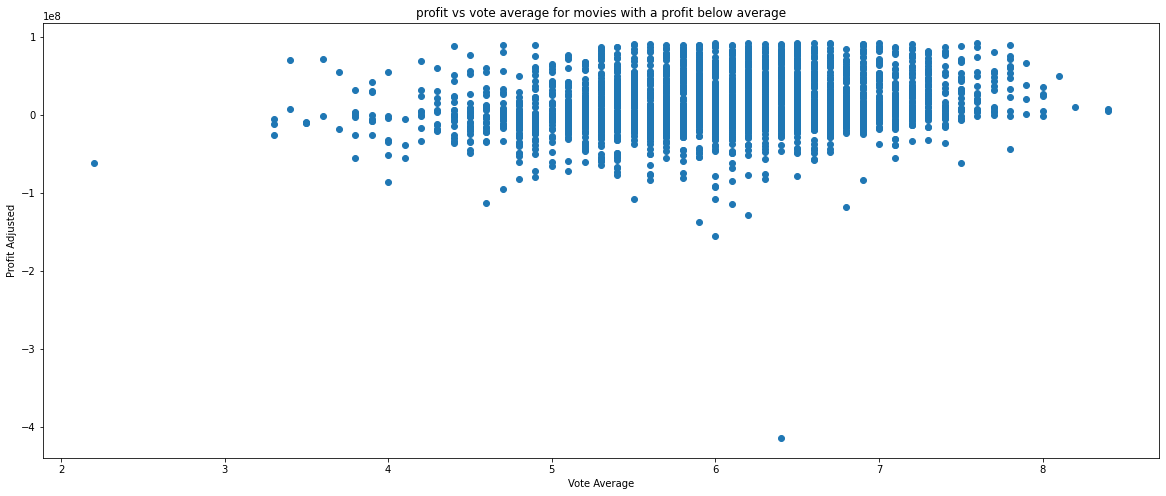

In [72]:
# scatter plot profit vs vote average for movies with a profit below average
plt.figure(figsize=(20, 8))
plt.scatter(df_below['vote_average'], df_below['profit_adj'])

plt.yticks([-4*1e8, -3*1e8,-2*1e8,-1*1e8, 0, 1*1e8])
plt.title('profit vs vote average for movies with a profit below average')
plt.xlabel('Vote Average');
plt.ylabel('Profit Adjusted')

### Conclusion: Comparing these two plots, no clear advantage in vote average of financially more successful movies is demonstrated. Movies in both above-average and below-average groups show comparable vote average. Thus, we cannot say that financial success is strongly related to how audiences rate a movie.

### Q6. Are movies financially more suceessful generally more popular?


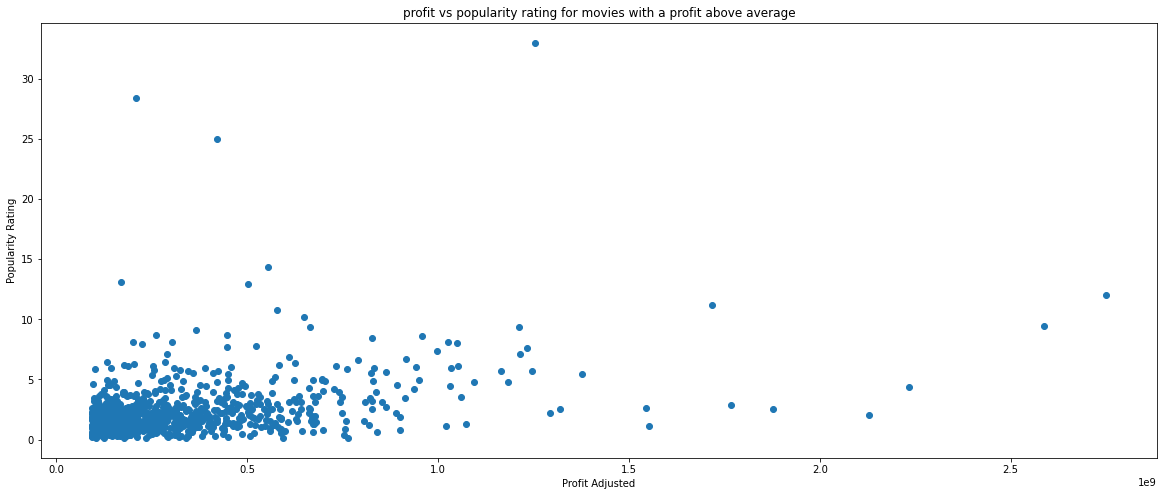

In [79]:
# scatter plot profit vs popularity rating for movies with a profit above average
plt.figure(figsize=(20, 8))
plt.scatter(df_above['profit_adj'], df_above['popularity'])

plt.title('profit vs popularity rating for movies with a profit above average')
plt.xlabel('Profit Adjusted');
plt.ylabel('Popularity Rating');

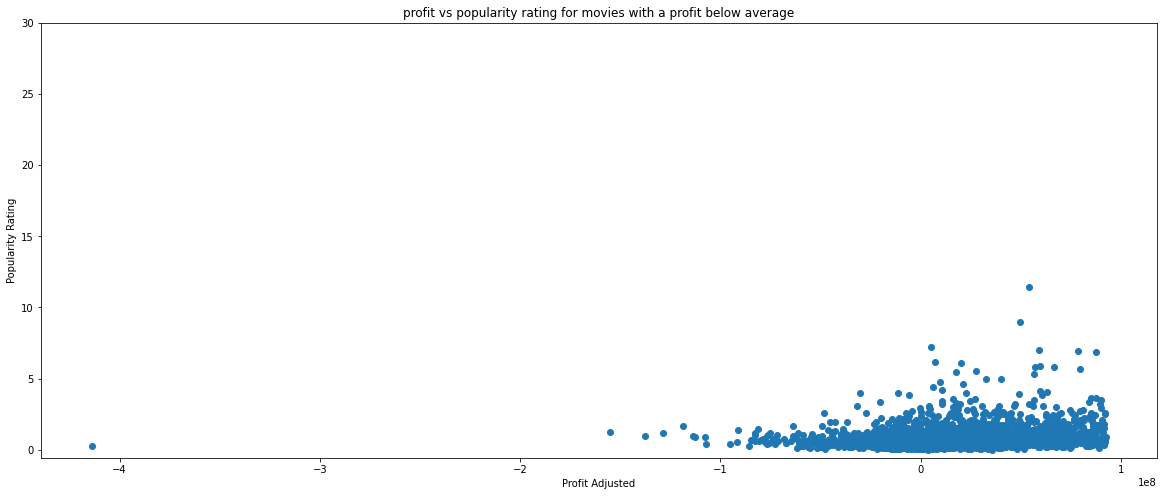

In [83]:
# scatter plot profit vs popularity rating for movies with a profit below average
plt.figure(figsize=(20, 8))
plt.scatter(df_below['profit_adj'], df_below['popularity'])

plt.yticks([0,5,10,15,20,25,30])
plt.title('profit vs popularity rating for movies with a profit below average')
plt.xlabel('Profit Adjusted')
plt.ylabel('Popularity Rating');

### Conclusion: Comparing these two plots, it's pretty clear that financially more successful movies show an advantage in popularity rating over those less successful.

In [91]:
df.to_csv('tmdb-movies.csv', index = False)

## Conclusions

I am mainly intereted in finding out about three fundamental questions
1. How have movies change over the decades?
2. What features generally decide how popular a movie is?
3. Does financial success translate to good reviews of a movie?

* Q0 serves to give us a quick sense of whhich directors appear most frequently in this database, 
* Q1 & Q2 focus on the number of movie released year by year and how audiences perceive movies from each time period. The conlusion is that generally more and more movies are being released along with time, and movie audiences show a prominent preference for more recent movies.

* Q2 & Q4 focus on the roles budget and runtime play in the popularity of a movie. Generally, movies with higher budget or a runtime within a certain range are more popular, but it's worth noting that exceptions certainly do exist.

* Q5 & Q6 focus on the features of financially successful movies. It's clear that financially successful movies are usually more popular but not necessarily better-received.

## Limitations

Firstly, there remains a lot more areas worth investigating, and I was mainly focused on certain aspects. 

Also, missing values or suspicious outliers in the data wrangling part are not fully addressed, leaving potential errors to affect the validity of some analysis. 

Finally, correlation doesn't equal causality. While it may be true that certain features seem to coincide with certain features, it requires further investigation to conclude how those features really interplay.